# Forest distribution under SPA0 scenario

Author: Firza Riany  
Email: firza.riany@climateanalytics.org  
Date: 26.08.2021 - 30.08.2021

Aim(s) of analysis:  
1. Observing the temporal distribution of various land types under SPA0 scenario

Datasets:  
- Land cover allocation from IMAGE: `GLANDCOVER_30MIN.nc`  
- World borders: `TM_WORLD_BORDERS-0`  
- Total land area: `GAREA_30M.asc` to calculate the area of each land use type  
- Scenario:`SSP1_SPA0_19I_LIRE_LB`
- Model: `IMAGE` 

Using SSP1_SPA0_19I_LIRE_LB
- with climate mitigation and adaptation targets i.e. NDCs, SDGs  
- low biomass scenario
- lifestyle change and ambitious renewable energy targets

Description:  
Because it's low biomass scenario, the scenario doesn't assume the allocation of land for biomass production.  
**Brazil.** In 2020, central and northern Brazil are populated with agriculture while the rest is populated with forest. Forest is expanding even covering the lands previously used for agriculture (through reforestation and restoration, probably). Agriculture is intensified and concentrated in certain areas. Protected forest is maintained and keeps growing.  
**Indonesia.** Forest area is expanding. Protected areas are predicted to be well-maintained. Agriculture occurs in non-forested lands and the area will be stable over the next years. There is no sign of intensification of agriculture system (visually speaking).  
**EAF.** There are not so much forest to begin with, the amount will be kept stable. The rest of the land is populated with agriculture. Agriculture is expanding and intensified, especially in the mainland. On the other hand, agriculture is not expanding in the island and forest is replacing some of it.

In [1]:
# libraries 
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import regionmask
import os

In [2]:
%matplotlib inline

In [48]:
os.getcwd()

'/Users/firzariany/Documents/ikea_land_use/unstaged_scripts'

In [4]:
# for now, source the data from box
path = "/Users/firzariany/Box/Climate Policy Team/02 - Projects/IKEA NDC 1.5° Pathways 20-22/2- Work Packages/WP3 -  LULUCF Pathways/Workflow/Data/IMAGE_SSPs/"

file = path + "SSP1s_july2021/SSP1_SPA0_19I_LIRE_LB/GLANDCOVER_30MIN.NC"

df_19 = (xr.open_dataset(file))

In [5]:
# global land area
ar_file = path + "GAREA_30M.asc"

area = (xr.open_rasterio(ar_file)
       .rename({"y" : "latitude", "x" : "longitude"})
        .sel(band = 1)
       )

In [6]:
# world border
b_file = path + "TM_WORLD_BORDERS-0"

regions = gpd.read_file(b_file)

In [7]:
# select land cover variable
glandcov_19 = df_19.GLANDCOVER_30MIN

## Functions to calculate forest area

In [8]:
# years_to_use = ["2020-01-01", "2030-01-01", "2050-01-01", "2100-01-01"]

In [30]:
# it has different name for the band (NGLNDCOV while in 1_26 it's N)
# updating the function to get a forest area in several years
# for SSP1_19
def area_yr_2(variable, land, date):
    forest_df = variable.sel(NGLNDCOV = land, time = date)
    for_area = forest_df * area
    return for_area

In [10]:
# fun forest area per region
def area_reg(reg_name, area):
    reg = reg_name
    area_set = area.rio.set_crs(4326)
    g_reg = reg.geometry
    clipped = area_set.rio.clip(g_reg, area_set.rio.crs)
    return clipped

---
## Getting only the forest distribution

In [32]:
glandcov_19

<xarray.DataArray 'GLANDCOVER_30MIN' (time: 27, lat: 360, lon: 720, NGLNDCOV: 5)>
[34992000 values with dtype=float32]
Coordinates:
  * NGLNDCOV  (NGLNDCOV) |S50 b'cropland                                     ...
  * lon       (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat       (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time      (time) datetime64[ns] 1970-01-01 1975-01-01 ... 2100-01-01
Attributes:
    units:      1
    long_name:  glandcover agregrated to 30 min

In [31]:
# fun for land_type distribution
def dist_reg_2(variable, land_type, date, reg_name):
    dist_df = variable.sel(NGLNDCOV = land_type, time = date)
    dist_df = dist_df.rio.set_crs("epsg:4326")
    reg = reg_name
    g_reg = reg.geometry
    clipped = dist_df.rio.clip(g_reg, dist_df.rio.crs)
    return clipped

---
## Temporal evolution of forest distribution

### Brazil in 2020, 2030, 2050, 2100

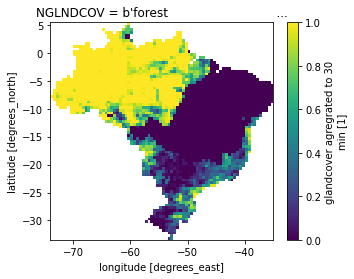

In [49]:
# 2010
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2010-01-01", reg_name = br).plot()

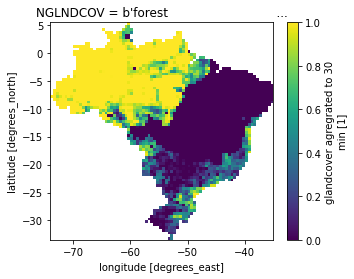

In [33]:
# 2020
br = regions[regions.ISO3 == "BRA"]

plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2020-01-01", reg_name = br).plot()

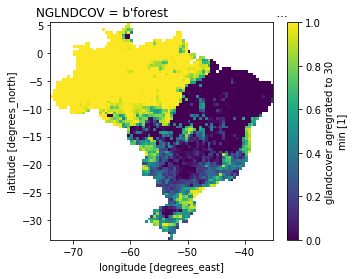

In [15]:
# 2030
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2030-01-01", reg_name = br).plot()

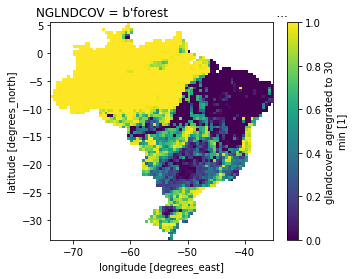

In [16]:
# 2050
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2050-01-01", reg_name = br).plot()

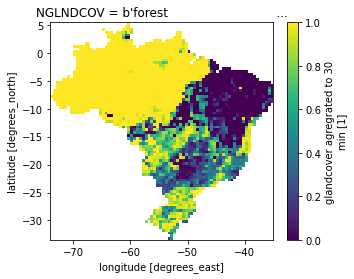

In [17]:
# 2100
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2100-01-01", reg_name = br).plot()

---
### Indonesia in 2020, 2030, 2050, 2100

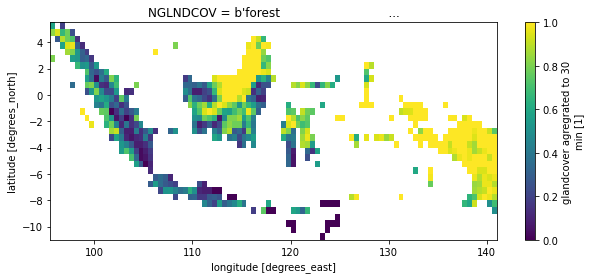

In [51]:
# 2010
plt.figure(figsize=[10,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2010-01-01", reg_name = indo).plot()

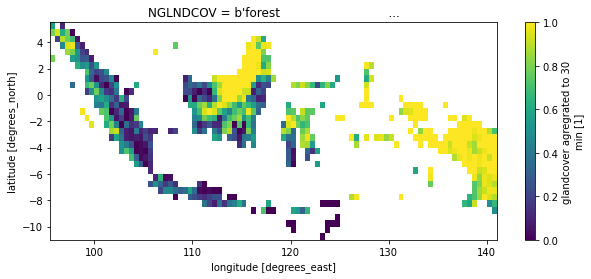

In [34]:
# 2020
indo = regions[regions.ISO3 == "IDN"]

plt.figure(figsize=[10,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2020-01-01", reg_name = indo).plot()

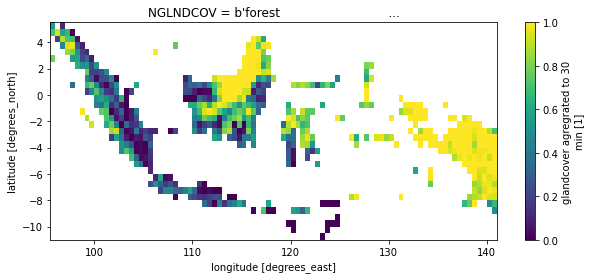

In [20]:
# 2030
plt.figure(figsize=[10,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2030-01-01", reg_name = indo).plot()

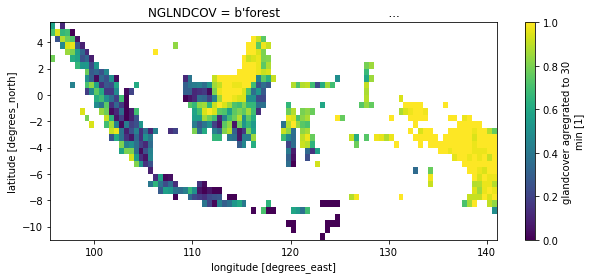

In [21]:
# 2050
plt.figure(figsize=[10,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2050-01-01", reg_name = indo).plot()

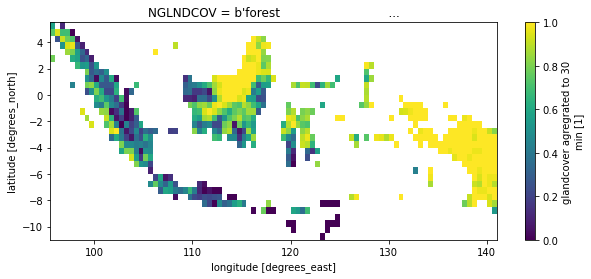

In [22]:
# 2100
plt.figure(figsize=[10,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2100-01-01", reg_name = indo).plot()

---
### Eastern African countries

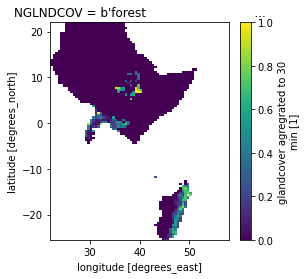

In [52]:
# 2010
plt.figure(figsize=[4,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2010-01-01", reg_name = eaf).plot()

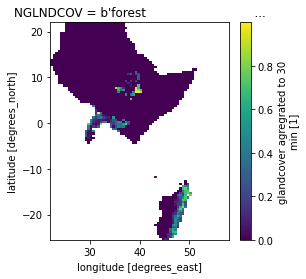

In [35]:
# 2020
eaf_iso = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MUS", "RWA", "SYC", "SOM", "SDN", "UGA"]
eaf = regions[regions.ISO3.isin(eaf_iso)]

plt.figure(figsize=[4,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2020-01-01", reg_name = eaf).plot()

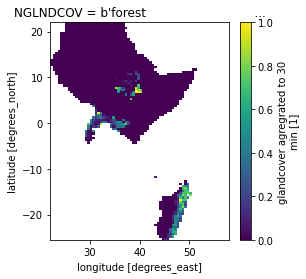

In [25]:
# 2030 
plt.figure(figsize=[4,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2030-01-01", reg_name = eaf).plot()

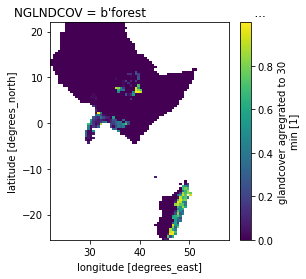

In [26]:
# 2050
plt.figure(figsize=[4,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2050-01-01", reg_name = eaf).plot()

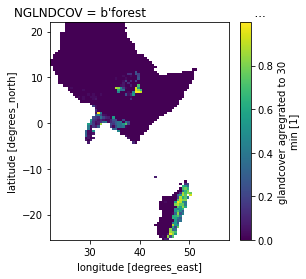

In [27]:
# 2100
plt.figure(figsize=[4,4])
dist_reg_2(variable = glandcov_19, land_type = b'forest                                            ',
           date = "2100-01-01", reg_name = eaf).plot()

---
## Temporal evolution of cropland distribution

### Brazil in 2020, 2030, 2050, 2100

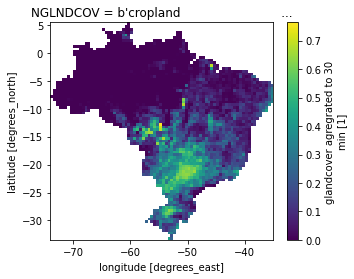

In [36]:
# 2020
# br = regions[regions.ISO3 == "BRA"]

plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2020-01-01", reg_name = br).plot()

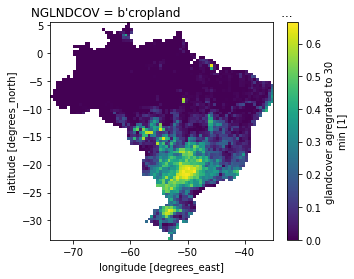

In [37]:
# 2030
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2030-01-01", reg_name = br).plot()

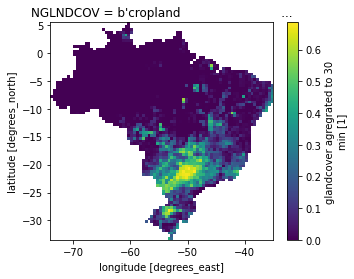

In [38]:
# 2050
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2050-01-01", reg_name = br).plot()

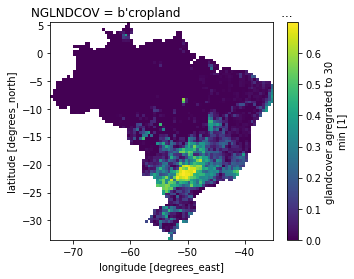

In [39]:
# 2100
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2100-01-01", reg_name = br).plot()

---
### Indonesia in 2020, 2030, 2050, 2100

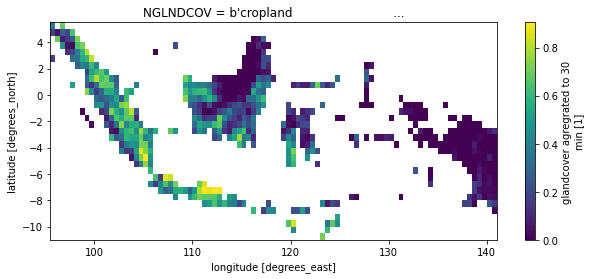

In [40]:
# 2020
# indo = regions[regions.ISO3 == "IDN"]

plt.figure(figsize=[10,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2020-01-01", reg_name = indo).plot()

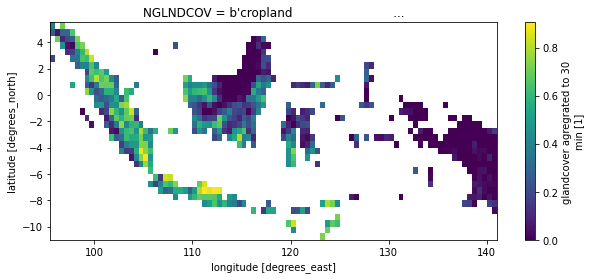

In [41]:
# 2030
plt.figure(figsize=[10,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2030-01-01", reg_name = indo).plot()

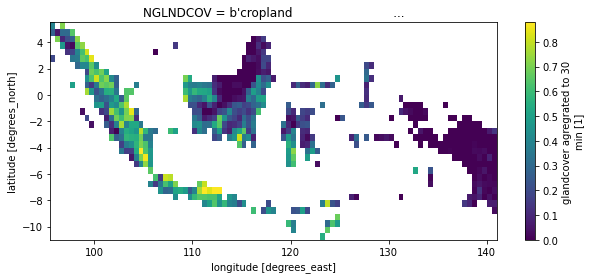

In [42]:
# 2050
plt.figure(figsize=[10,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2050-01-01", reg_name = indo).plot()

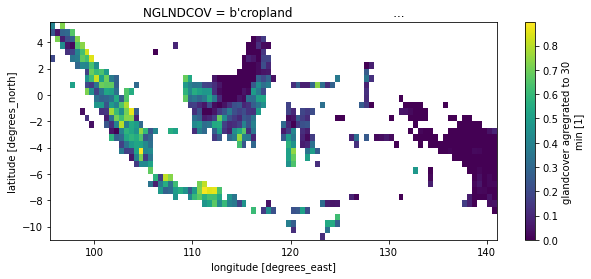

In [43]:
# 2100
plt.figure(figsize=[10,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2100-01-01", reg_name = indo).plot()

---
### Eastern African countries in 2020, 2030, 2050, 2100

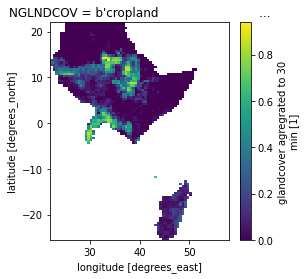

In [44]:
# 2020
# eaf = regions[regions.ISO3.isin(eaf_iso)]

plt.figure(figsize=[4,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2020-01-01", reg_name = eaf).plot()

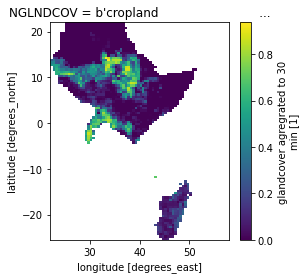

In [45]:
# 2030
plt.figure(figsize=[4,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2030-01-01", reg_name = eaf).plot()

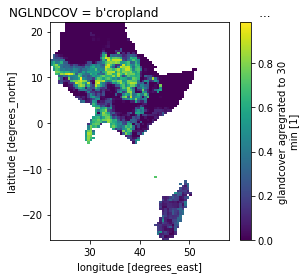

In [46]:
# 2050
plt.figure(figsize=[4,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2050-01-01", reg_name = eaf).plot()

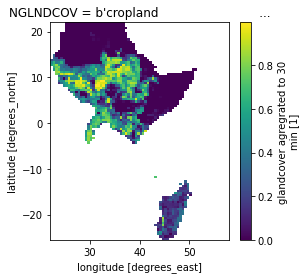

In [47]:
# 2100
plt.figure(figsize=[4,4])
dist_reg_2(variable = glandcov_19, land_type = b'cropland                                          ',
           date = "2100-01-01", reg_name = eaf).plot()